In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
from sklearn import metrics
from collections import Counter
from matplotlib import pyplot as plt
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

# Task 1: Inferring decoding and encoding

## Section A

I. _Encoding and decoding definitions and limitations_:

Decoding models learn mapping from neural responses to corresponding stimuli or behavioural outcomes to reveal whether information is contained in the brain. Encoding models learn mapping in the reverse direction to predict how information is represented in the brain.

Decoding models:
- brought about a shift of paradigm from neural activity to information content, which enables researchers to ask more useful questions about whether responses in specific regions encode information.
- leverage the highly multivariate data generated by modern neuroimaging methods, whereas previous approaches had to treat lower-level patterns as noise and smoothen them.
- are trained on one dataset and tested on an independent dataset. Unlike distribution-dependent models, inappropriate assumptions are reflected in low performance, which makes them less prone to incorrect conclusions.

However, they:
- cannot be interpreted as brain-computational models when they reverse the natural direction of information flow and are limited to linear operations.
- feature weights are inter-dependent, thus they do not necessarily translate to significant individual contributions, a problem known as the feature fallacy.
- cannot be used to characterise the representational or computational properties of the brain. They only provide evidence that information can be explained by neural responses.

Encoding models:
- accept more complex sets of descriptive features than traditional linear models, thus regularisation plays a relevant role.
- are compatible with nonlinear components, thus represent more realistic models
- are tested on an independent dataset of experimental conditions, similar to decoding. 
- can be interpreted as brain-computational models when they follow the natural direction of information flow, such as in sensory systems.

However, they:
- predict univariately from different response channels, which ignores correlations between features, increases multiple testing and complicates between-subject comparisons. 
- feature weights cannot be easily interpreted because they depend on the model fit, which is one from an infinite amount. This is related to the problem of feature fallacy.

II. _Challenges in inferring decoding and encoding_:

George E.P. Box’s famous quote goes “All models are wrong, but some are useful”. Such concept holds for decoding and encoding as well, which come with three main caveats. First, the boundary between encoding and decoding is arbitrarily chosen based on the brain region under investigation. In fact, they represent two halves of the same processing path. Second, there might exist other processing paths than the one involving the region under investigation through which the same information flows. Thus, models provide a partial yet useful representation of information content and format. Third, encoders and decoders do not always follow the natural direction of information flow (from stimulus to response and from response to behavioural outcome, respectively), in which case they cannot be used to infer computational mechanisms of the brain.

By default, decoding models only provide evidence of information content for a region of interest rather than an exact representation of its computational mechanisms, both for the caveats explained above as well as the limitations described in question I. However, decoding models can be interpreted as brain-computational models when they satisfy a few conditions. First, they should be biologically plausible. Linear models reduce complexity and simplify interpretation, but they do not represent a realistic view of computational mechanisms. Second, they should follow the natural direction of information flow, from neural responses to behavioural outcomes. Even when these assumptions are satisfied, computational theories should not be assessed on the basis of a single model, which might lead to the single-model significance fallacy. Instead, several models should be considered and compared against one another.

III. _How to decode_:

Three popular decoding approaches entail linear models, stimulus reconstruction and behavioural prediction. Linear models are well established and suitable for response categories that are at least in part linearly separable. The level of explainable complexity is limited to linear and simple nonlinear relations, and thus linear models might fit well single-neuron operations which process so-called explicit information. Stimulus reconstruction aims to re-code the stimulus from the produced response. Although it provides much richer and more ambitious information than linear models, its interpretation is not as straightforward, especially because relatively complex priors might be set to simplify the output space. Decoders for behavioural prediction, where behaviour may consist of reaction time or response category, follow the natural direction of information flow, thus they can be interpreted as brain-computational models. They are still subject to the tradeoff between complexity and explainability.

Generalisation of decoders is statistically advantageous to test information content because they are inherently multivariate, thus they exploit noise correlations between features to fit the model. Additionally, the model is trained on one dataset and evaluated on independent data to avoid overfitting.

The need of generalisation is particularly stringent for stimulus reconstruction, where the stimulus space is so diverse that is hard to learn exhaustively, especially given the limited size of the train set. Therefore, the train conditions have to be sampled from the stimulus space smartly, well exemplified by Pereira et al., 2018, in the context of semantic representation of words. To improve the quality of reconstruction, priors can be imposed to limit the output space to realistic stimuli. However, this makes performance depend not only on information content but also the complexity of the output space, which must be considered when interpreting results. In machine learning jargon, these two parameters are not othogonalised, since they affect the same outcome.

## Section B


In [2]:
# Define function that computes population vector and predicted direction
def encoder(angle, n, r0=55, noise=False):

    circle = 2 * np.pi
    step = circle / n
    
    alpha = np.linspace(0, circle - step, n)
    r = np.maximum(0, r0 * np.cos(angle - alpha) + int(noise) * np.random.normal(0, 4, n))

    pop = (r - r0) / np.max(r)
    x = np.sum(pop * np.cos(alpha))
    y = np.sum(pop * np.sin(alpha))

    pred = np.arctan(y / x)

    if x > 0 and y < 0:
        pred += 2 * np.pi
    elif x < 0:
        pred += np.pi

    return r, pred

## Section C

In [3]:
# Perform encoding and decoding for a set of directions
def encode_circle(angles, n, noise=False):

    r_list = []
    pred_list = []

    for angle in angles:
    
        r, pred = encoder(angle, n, noise=noise)
    
        r_list.append(r)
        pred_list.append(pred)

    r = np.array(r_list)
    pred = np.array(pred_list)

    return r, pred

In [4]:
# Define circular space
angles = np.linspace(0, 2 * np.pi, 360)
ticks_range = np.linspace(0, 2 * np.pi, 5)

# Encode circular space with 4 neurons
r4, pred4 = encode_circle(angles, 4)

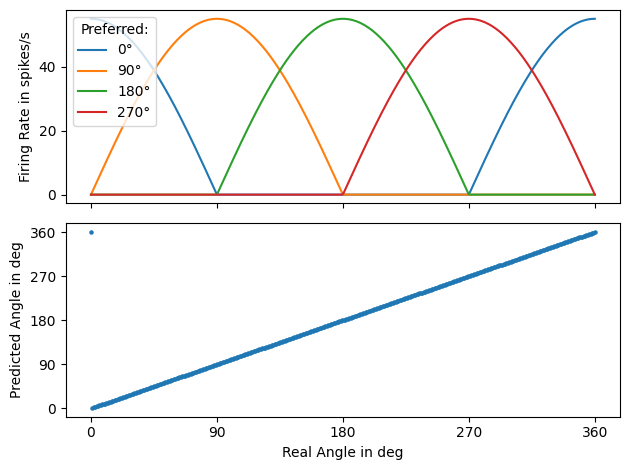

In [5]:
# Visualise encoding and decoding performance
fig, axes = plt.subplots(2, sharex=True)

axes[0].plot(angles, r4)

axes[0].set_xticks(ticks_range, np.rad2deg(ticks_range).astype(int))

axes[0].set_ylabel("Firing Rate in spikes/s")
axes[0].legend(["0°", "90°", "180°", "270°"], title="Preferred:", loc = "upper left")

axes[1].scatter(angles, pred4, s=5)

axes[1].set_xticks(ticks_range, np.rad2deg(ticks_range).astype(int))
axes[1].set_yticks(ticks_range, np.rad2deg(ticks_range).astype(int))

axes[1].set_xlabel("Real Angle in deg")
axes[1].set_ylabel("Predicted Angle in deg")

plt.tight_layout()

## Section D

In [6]:
# Encode circular space with 8 neurons
r8, pred8 = encode_circle(angles, 8)

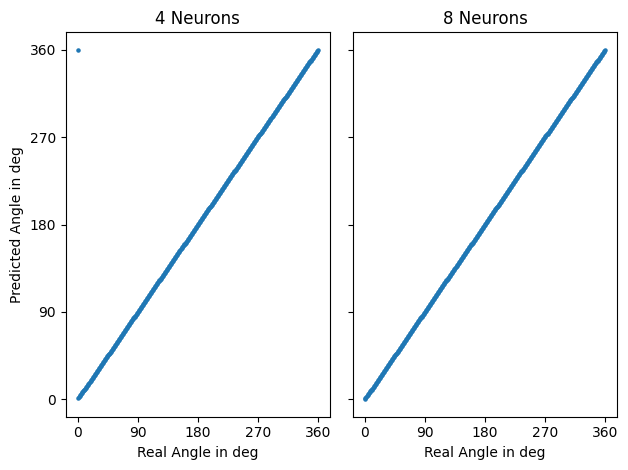

In [7]:
# Compare predictive performance
fig, axes = plt.subplots(1, 2, sharey=True)

axes[0].scatter(angles, pred4, s=5)

axes[0].set_xticks(ticks_range, np.rad2deg(ticks_range).astype(int))
axes[0].set_yticks(ticks_range, np.rad2deg(ticks_range).astype(int))

axes[0].set_xlabel("Real Angle in deg")
axes[0].set_ylabel("Predicted Angle in deg")
axes[0].set_title("4 Neurons")

axes[1].scatter(angles, pred8, s=5)

axes[1].set_xticks(ticks_range, np.rad2deg(ticks_range).astype(int))
axes[1].set_xlabel("Real Angle in deg")
axes[1].set_title("8 Neurons")

plt.tight_layout()

In [8]:
#r, pred = encode_circle(1000)

#np.sum(np.abs(angles - pred))

## Section E

In [9]:
# Define function that measures performance from muliple simulations
def simulate_encoding(angles, n, sim=100, noise=False):

    pred_list = []
    
    for i in range(sim):
        _, pred = encode_circle(angles, n, noise=True)
        pred_list.append(pred)
    
    pred_arr = np.array(pred_list)
    
    avg = np.mean(pred_arr, axis=0)
    stdev = np.mean(pred_arr, axis=0)
    rmse = np.mean(np.sqrt((angles - pred_arr)**2), axis=0)

    return avg, stdev, rmse

In [44]:
# Set number of simulations
sim = 100

# Find mean, sd and rmse for 4 and 8 neurons
avg4, stdev4, rmse4 = simulate_encoding(angles, 4, noise=True)
avg8, stdev8, rmse8 = simulate_encoding(angles, 8, noise=True)

# Compure standard error
sem4 = stdev4 / np.sqrt(sim - 1)
sem8 = stdev8 / np.sqrt(sim - 1)

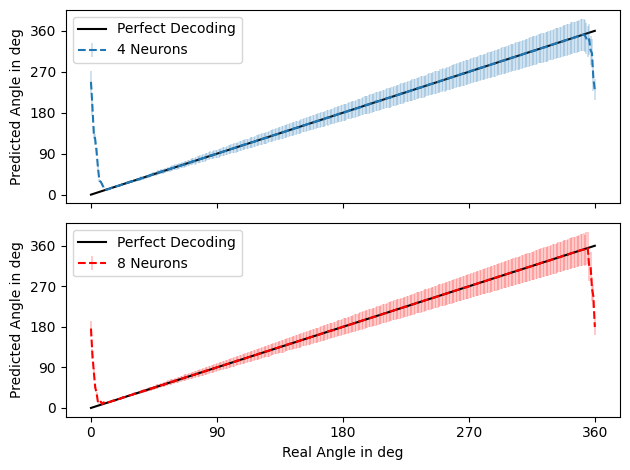

In [53]:
# Visually compare predictive performance
fig, axes = plt.subplots(2, sharex=True)

axes[0].plot(angles, angles, label="Perfect Decoding", c="k")
axes[0].errorbar(angles, avg4, yerr=sem4, elinewidth=0.3, label="4 Neurons", linestyle="--")

axes[0].set_ylabel("Predicted Angle in deg")
axes[0].legend(loc="upper left")

axes[0].set_xticks(ticks_range, np.rad2deg(ticks_range).astype(int))
axes[0].set_yticks(ticks_range, np.rad2deg(ticks_range).astype(int))

axes[1].errorbar(angles, avg8, yerr=sem8, elinewidth=0.3, label="8 Neurons", c="r", linestyle="--")
axes[1].plot(angles, angles, label="Perfect Decoding", c="k")

axes[1].set_xlabel("Real Angle in deg")
axes[1].set_ylabel("Predicted Angle in deg")

axes[1].set_yticks(ticks_range, np.rad2deg(ticks_range).astype(int))
axes[1].legend(loc="upper left")

plt.tight_layout()

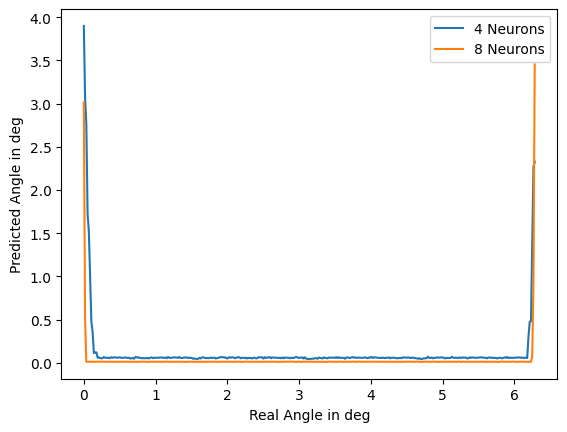

In [43]:
# Visually compare RMSE by direction
plt.plot(angles, rmse4, label="4 Neurons")
plt.plot(angles, rmse8, label="8 Neurons")

plt.xlabel("Real Angle in deg")
plt.ylabel("Predicted Angle in deg")
plt.legend()

In [42]:
# Compare total RMSE
print(f"Total RMSE for 4 neurons: {rmse4.sum():.5g}")
print(f"Total RMSE for 8 neurons: {rmse8.sum():.5g}")

Total RMSE for 4 neurons: 41.911
Total RMSE for 8 neurons: 12.072


## Section F

# Task 2: Estimators MAP and MLE

## Section A

In [24]:
# Import dataset
df = pd.read_csv("perceived_b.csv")
df.columns = ["actual_sound", "perceived_sound"]

In [25]:
# Count occurrences of every sound
library = Counter(df["actual_sound"])
prob_df = pd.DataFrame(index=library.keys())

# Find frequency of every sound
prob_df["library"] = library.values()
prob_df["likelihood"] = prob_df["library"] / prob_df["library"].sum()

Text(0, 0.5, 'Conditional Probability of \\bi\\')

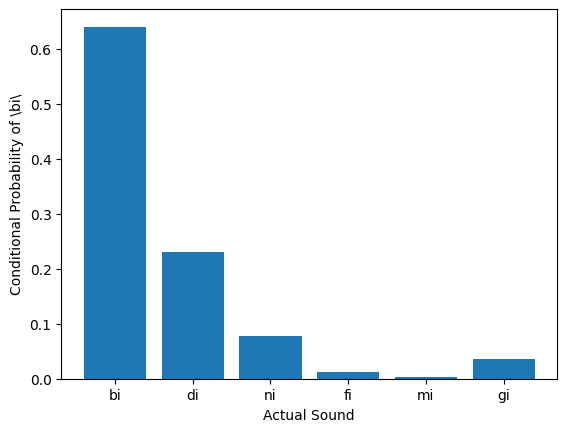

In [26]:
# Visualise conditional probability of perceived sound \bi\
plt.bar(prob_df.index, prob_df["likelihood"])
plt.xlabel("Actual Sound")
plt.ylabel("Conditional Probability of \\bi\\")

## Section B & C

In [27]:
# Set prior
prob_df["prior"] = [1.1, 0.2, 33.7, 0.01, 2.5, 15.3]

# Find MAP
prob_df["MLE"] = prob_df["likelihood"]
prob_df["MAP"] = prob_df["prior"] * prob_df["likelihood"]

print(tabulate(prob_df, headers="keys"))

      library    likelihood    prior         MLE          MAP
--  ---------  ------------  -------  ----------  -----------
bi        164    0.640625       1.1   0.640625    0.704688
di         59    0.230469       0.2   0.230469    0.0460938
ni         20    0.078125      33.7   0.078125    2.63281
fi          3    0.0117188      0.01  0.0117188   0.000117187
mi          1    0.00390625     2.5   0.00390625  0.00976562
gi          9    0.0351562     15.3   0.0351562   0.537891


In [22]:
# Predict perceived sound from MLE
mle_est = prob_df["MLE"].idxmax()
# Predict perceived sound from MLE
map_est = prob_df["MAP"].idxmax()

print(f"MLE estimator: {mle_est}")
print(f"MAP estimator: {map_est}")

MLE estimator: bi
MAP estimator: ni


## Section D

In [21]:
# Set new prior
prob_df["prior2"] = [30, 9, 2, 15, 7, 22]
# Find new MAP
prob_df["MAP2"] = prob_df["prior2"] * prob_df["likelihood"]

# Predict perceived sound from new MAP
map_est = prob_df["MAP2"].idxmax()

print(f"MLE estimator: {mle_est}")
print(f"MAP estimator: {map_est}")

MLE estimator: bi
MAP estimator: bi


# Task 3: Information theory

## Section A

In [68]:
# Define function to compute entropy
def find_entropy(freq, prob, show=True):

    entropy = -np.sum(freq * prob * np.log2(prob) + freq * (1 - prob) * np.log2(1 - prob))

    if show:
        print(f"Exposures: {freq}")
        print(f"Probabilities: {prob}")
        print(f"Entropy: {entropy:.2f}")
    
    return entropy

In [71]:
# Set first exposure and probability
exposure1 = np.array([0.5, 0.5])
prob = np.array([0.75, 0.125])

# Compute entropy for equal exposure
entropy1 = find_entropy(exposure1, prob)

Exposures: [0.5 0.5]
Probabilities: [0.75  0.125]
Entropy: 0.68


In [72]:
# Set second exposure
exposure2 = np.array([0.01, 0.99])

# Compute entropy for unequal exposure
entropy2 = find_entropy(exposure2, prob)

Exposures: [0.01 0.99]
Probabilities: [0.75  0.125]
Entropy: 0.55


## Section B

Calculate the conditional entropy of an H neuron, given the smell and the mutual information between the neuronal activity and the smell type.

In [75]:
# Define function to compute mutual information
def find_information(freq, prob, show=True):

    prior = np.sum(freq * prob)
    information = np.sum(freq * prob * np.log2(prob / prior) + freq * (1 - prob) * np.log2((1 - prob) / (1 - prior)))

    if show:
        print(f"Prior: {prior:.2f}")
        print(f"Information gain: {information:.3g}")
    
    return information

In [73]:
# Set exposure
exposure = np.array([0.4, 0.6])

# Compute entropy
entropy = find_entropy(exposure, prob)

Exposures: [0.4 0.6]
Probabilities: [0.75  0.125]
Entropy: 0.65


In [76]:
# Compute mutual information
information = find_information(exposure, prob)

Prior: 0.38
Information gain: 0.304


In [77]:
# Calculate conditional entropy
conditional_entropy = entropy - information
print(f"Conditional Entropy: {conditional_entropy:.3g}")

Conditional Entropy: 0.347


## Section C

In [78]:
# Visualise cross-correlation matrices for Marcel and Leonie
marcel = np.ones((2, 2))
leonie = np.array([1, 0, 0, 1]).reshape(2, 2)

print("Marcel:")
print(marcel)
print("Leonie:")
print(leonie)

Marcel:
[[1. 1.]
 [1. 1.]]
Leonie:
[[1 0]
 [0 1]]


In [79]:
# Define function to compute joint entropy (check if it's correct)
def find_joint_entropy(joint_prob, entropy, show=True):
    
    conditional_entropy = find_entropy(joint_prob, joint_prob, show=False)
    joint_entropy = entropy + conditional_entropy

    if show:
        print(f"Conditional Entropy: {conditional_entropy:.3g}")
        print(f"Joint Entropy: {joint_entropy:.3g}")

    return joint_entropy

Marcel's neurons show perfect correlation and therefore their firing is co-occurring. In this case, their conditional entropy is null and their joint entropy is equivalent to that of a single neuron.

In [102]:
# Set joint probability of not firing close to 0
joint_prob1 = 9e-10

# Compute first joint entropy
joint_entropy1 = find_joint_entropy(joint_prob1, entropy)

Conditional Entropy: 4.13e-11
Joint Entropy: 0.651


Leonie's neurons do not show correlation and therefore cannot depend on one another. In this case, their conditional entropy corresponds to the full entropy and their joint entropy is equivalent to the sum of their individual entropies.

In [88]:
# Store joint probabilities of firing
joint_prob2 = np.array([0.625**2, 0.375 * 0.625, 0.375 * 0.625, 0.375**2])

# Compute second joint entropy
joint_entropy2 = find_joint_entropy(joint_prob2, entropy)

Conditional Entropy: 0.828
Joint Entropy: 1.48


## Section D

## Section E

In [89]:
# Set table headers
headers = ["Event", "P(H1, H2)", "P(H1, H2|L)", "P(H1, H2|C)"]

Marcel's neurons exhibit only two types of events: either they both respond, or neither of them responds. The table below presents the prior $P(H_1, H_2)$ and the conditional probabilities given each smell $P(H_1, H_2|L)$ and $P(H_1, H_2|C)$ for Marcel's neurons.

In [90]:
# Set Marcel's prior
prior1 = np.array([0.375, 0.625]).reshape(2, 1)

# Set Marcel's conditional probabilities
conditional_prob1 = np.array([[0.75, 0.125],
                              [0.25, 0.875]])

prob_tab1 = pd.DataFrame(conditional_prob1, index=["++", "--"])
prob_tab1["prior"] = prior1

print(tabulate(prob_tab1, headers=headers))  

Event      P(H1, H2)    P(H1, H2|L)    P(H1, H2|C)
-------  -----------  -------------  -------------
++              0.75          0.125          0.375
--              0.25          0.875          0.625


Leonie's neurons show independent behaviour from one another, and thus their probabilities of firing must be multiplied. The table below presents the prior $P(H_1, H_2)$ and the conditional probabilities given each smell $P(H_1, H_2|L)$ and $P(H_1, H_2|C)$ for Leonie's neurons.

In [91]:
# Set Leonie's prior
prior2 = np.array([0.375**2, 0.375 * 0.625, 0.625 * 0.375, 0.625**2]).reshape(4, 1)

# Set Leonie's conditional probabilities
conditional_prob2 = np.array([[0.75**2, 0.125**2],
                              [0.75 * 0.25, 0.125 * 0.875],
                              [0.25 * 0.75, 0.875 * 0.125],
                              [0.25**2, 0.875**2]])

prob_tab2 = pd.DataFrame(conditional_prob2, index=["++", "+-", "-+", "--"])
prob_tab2["prior"] = prior2

print(tabulate(prob_tab2, headers=headers))           

Event      P(H1, H2)    P(H1, H2|L)    P(H1, H2|C)
-------  -----------  -------------  -------------
++            0.5625       0.015625       0.140625
+-            0.1875       0.109375       0.234375
-+            0.1875       0.109375       0.234375
--            0.0625       0.765625       0.390625


The function below is used to compute the mutual information $I(H_1, H_2; S)$ for each couple of neurons.

In [92]:
# Define function to compute joint information (check if it's correct)
def find_joint_information(prob, freq, prior):
    
    information = np.sum(freq * prob * np.log2(prob / prior))

    return information

In [93]:
# Compute joint mutual information for Marcel and Leonie
joint_information1 = find_joint_information(conditional_prob1, exposure, prior1)
joint_information2 = find_joint_information(conditional_prob2, exposure, prior2)

tab = {"Subject": ["Marcel", "Leonie"], "I(H1, H2; S)": [joint_information1, joint_information2]}

print(tabulate(tab, headers="keys"))

Subject      I(H1, H2; S)
---------  --------------
Marcel           0.303784
Leonie           0.607568


As expected, the mutual information for Leonie's neurons is twice as large as Marcel's.

# References

1. Kriegeskorte, Nikolaus, and Pamela K. Douglas. "Interpreting encoding and decoding models." Current opinion in neurobiology 55 (2019): 167-179.
2. Pereira, Francisco, et al. "Toward a universal decoder of linguistic meaning from brain activation." Nature communications 9.1 (2018): 963.